In [14]:
import pandas as pd
import numpy as np
from statistics import variance
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("/Users/shivanimudhelli/Downloads/US_births_1994-2003_CDC_NCHS.csv", header=0)


In [16]:
data_mth = pd.DataFrame(data.groupby(by= 'month')["births"].sum())
births = data_mth["births"]
birth_mean = births.mean()
birth_var = variance(births)
print('sample mean:', birth_mean)
print('sample variance:', birth_var)


sample mean: 3310178.0833333335
sample variance: 21066456772.083332


<AxesSubplot: >

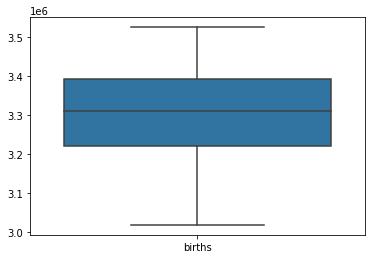

In [17]:
# quartiles for birth data 2000 to 2004
sns.boxplot(pd.DataFrame(births))


In [18]:
# actual values
q3_a, q1_a = np.percentile(births, [75,25])
iqr_actual = q3_a-q1_a
print('Actual IQR: ', iqr_actual)

mad_actual = births.mad()
print('Actual MAD: ', mad_actual)

Actual IQR:  173318.75
Actual MAD:  109176.75


In [19]:
# bootstrap for iqr
sample_iqr = []
for j in range(0,10000):
    boot_samples = births.sample(n=12, replace=True)
    q3, q1 = np.percentile(boot_samples, [75,25])
    boot_iqr = q3 - q1
    sample_iqr.append(boot_iqr)

print('mean of samples IQR:', np.mean(sample_iqr))
print('variance of samples IQR:', variance(sample_iqr))

mean of samples IQR: 169853.90715
variance of samples IQR: 4375526873.131442


Text(0, 0.5, 'Frequency')

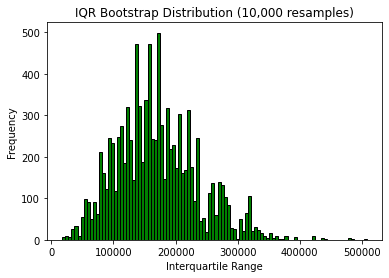

In [20]:
# plot iqr of resamples
ax1 = plt.hist(sample_iqr, bins = 100, edgecolor='black', color = 'green')
plt.title("IQR Bootstrap Distribution (10,000 resamples)")
plt.xlabel("Interquartile Range")
plt.ylabel("Frequency")


In [21]:
# bootstrap for mad
sample_mad = []
for k in range(0,10000):
    boot_samples2 = births.sample(n=12, replace=True)
    boot_mad = boot_samples2.mad()
    sample_mad.append(boot_mad)
    
print('mean of samples MAD:',np.mean(sample_mad))
print('variance of samples MAD:', variance(sample_mad))

print(variance(sample_iqr) > variance(sample_mad))

mean of samples MAD: 106283.45264444443
variance of samples MAD: 581204513.6104468
True


In [22]:
print('bias for IQR:', np.mean(sample_iqr)-iqr_actual)
print('bias for MAD:', np.mean(sample_mad)-mad_actual)

bias for IQR: -3464.8428499999864
bias for MAD: -2893.2973555555654


Text(0, 0.5, 'Frequency')

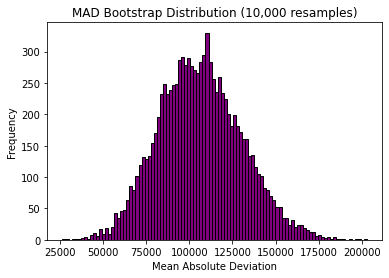

In [23]:
# plot mad of resamples
ax2 = plt.hist(sample_mad, bins = 100, edgecolor='black', color = 'purple')
plt.title("MAD Bootstrap Distribution (10,000 resamples)")
plt.xlabel("Mean Absolute Deviation")
plt.ylabel("Frequency")